In [24]:
# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'run7'
testname1 = 'throughput2' # 'throughput1' or 'throughput2'


testalgo2 = 'hbbft'
testrun2 = 'run8'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")



In [26]:

def addCalcedColumns(df):
    df['blockTime'] =  df.timestamp - df.shift(1).timestamp
    df['txs'] = df.numberOfTransactions / df.blockTime
    df['blockTimeSinceStart'] =  df.timestamp - df.timestamp.min()

#blocksFile = 'data/' + testalgo + '/' + testrun + '/' + testname + '/blocks.log.csv'

# blocksFile = 'data/hbbft/proofs/poolProtection/blocks.log.csv'

blocksFile1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 + '/blocks.blocks.csv'
blocksFile2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 + '/blocks.blocks.csv'


df1 = pd.read_csv(blocksFile1)
df2 = pd.read_csv(blocksFile2)


addCalcedColumns(df1)
addCalcedColumns(df2)


# 1585951074

df1

,blockNumber,numberOfTransactions,gasUsed,timestamp,size,blockTime,txs,blockTimeSinceStart
0,751,3,63000,1586078568,892,NaN,NaN,0
1,752,19,399000,1586078569,2519,1.0,19.000000,1
2,753,176,3696000,1586078570,18532,1.0,176.000000,2
3,754,728,15288000,1586078571,74920,1.0,728.000000,3
4,755,274,5754000,1586078572,28743,1.0,274.000000,4
...,...,...,...,...,...,...,...,...
103,854,952,19992000,1586078846,99577,5.0,190.400000,278
104,855,952,19992000,1586078852,99579,6.0,158.666667,284
105,856,952,19992000,1586078859,99585,7.0,136.000000,291
106,857,952,19992000,1586078864,99583,5.0,190.400000,296


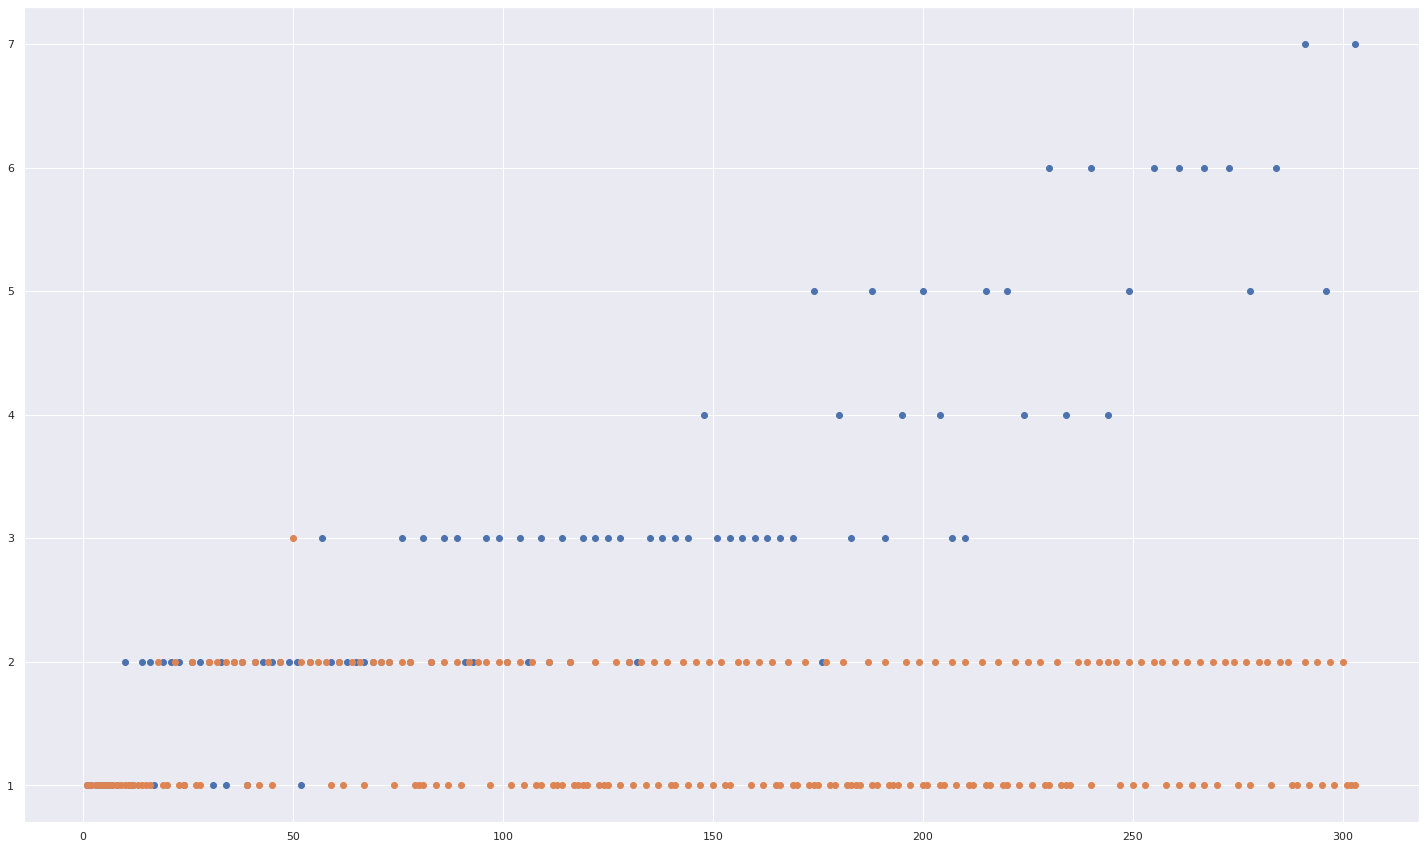

In [27]:
#blocktime chart.

plt.scatter(df1.blockTimeSinceStart, df1.blockTime)
plt.scatter(df2.blockTimeSinceStart, df2.blockTime)

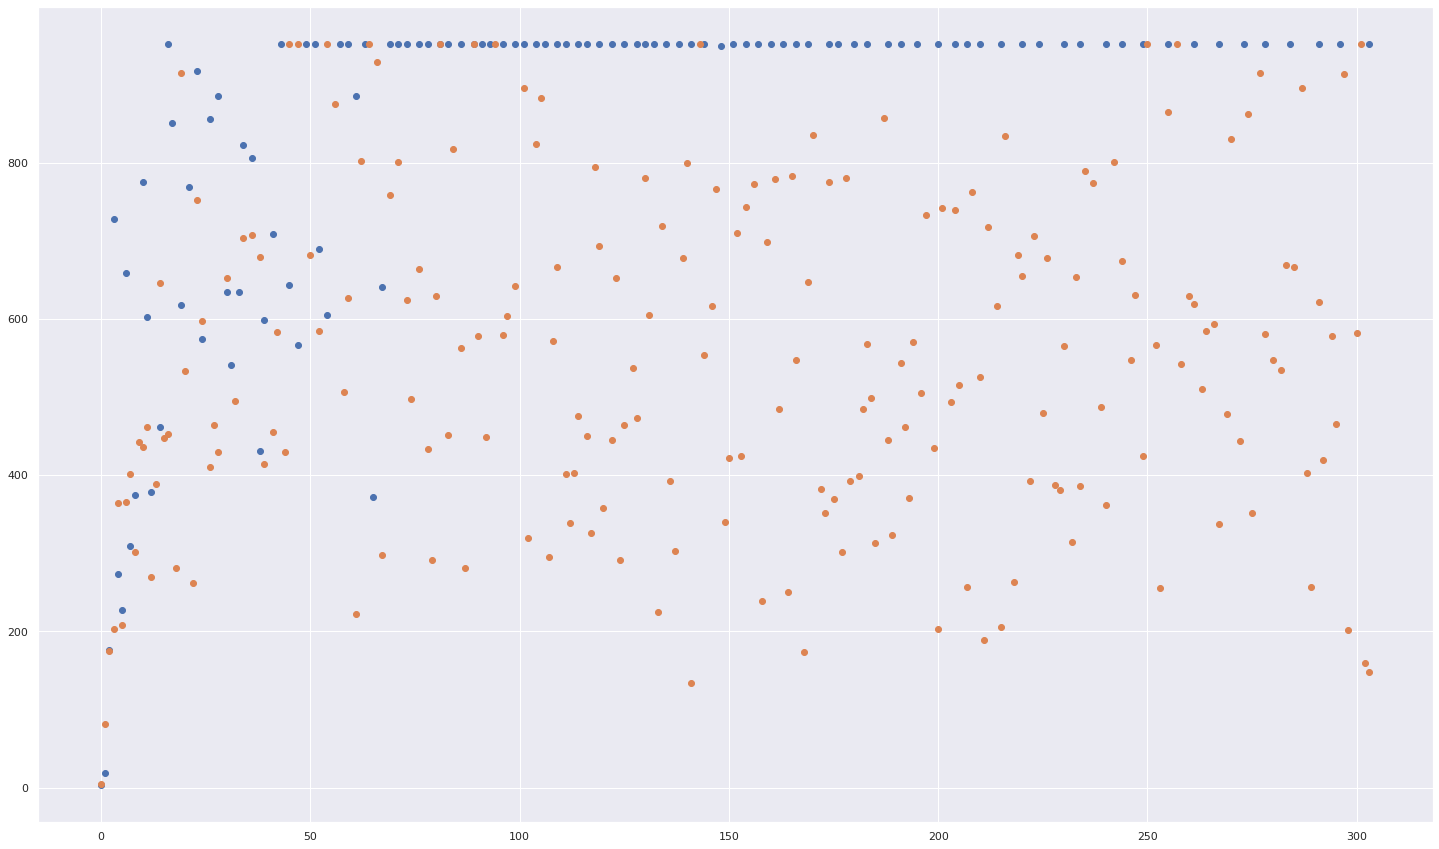

In [28]:
#transactions per block.

plt.scatter(df1.blockTimeSinceStart, df1.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df1.numberOfTransactions.rolling(window=9).mean())

plt.scatter(df2.blockTimeSinceStart, df2.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df2.numberOfTransactions.rolling(window=9).mean())

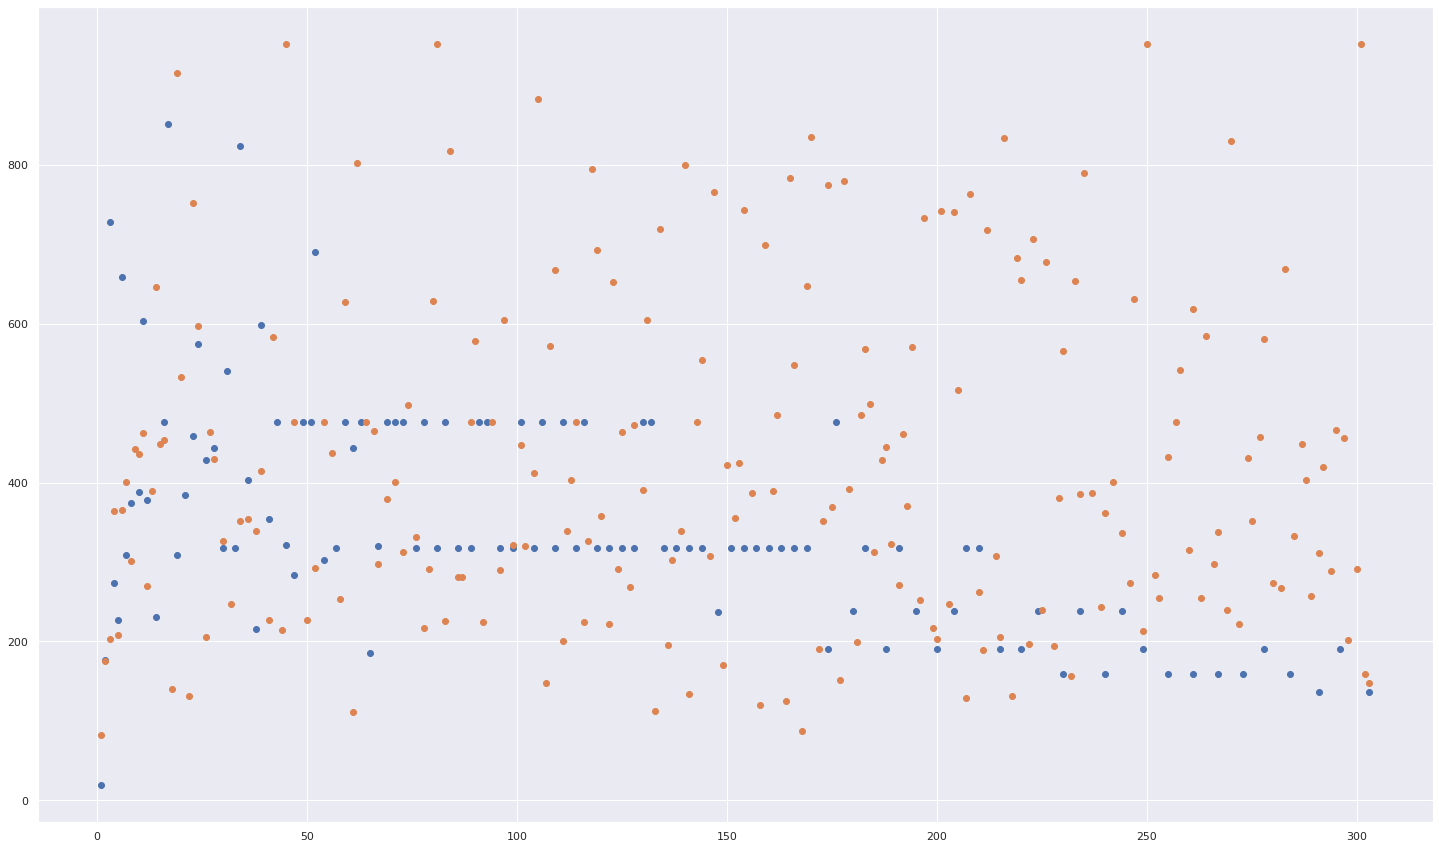

In [29]:
#plt.plot(df3.txs)
plt.scatter(df1.blockTimeSinceStart, df1.txs.rolling(window=1).mean())

#plt.plot(df4.txs)
plt.scatter(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())


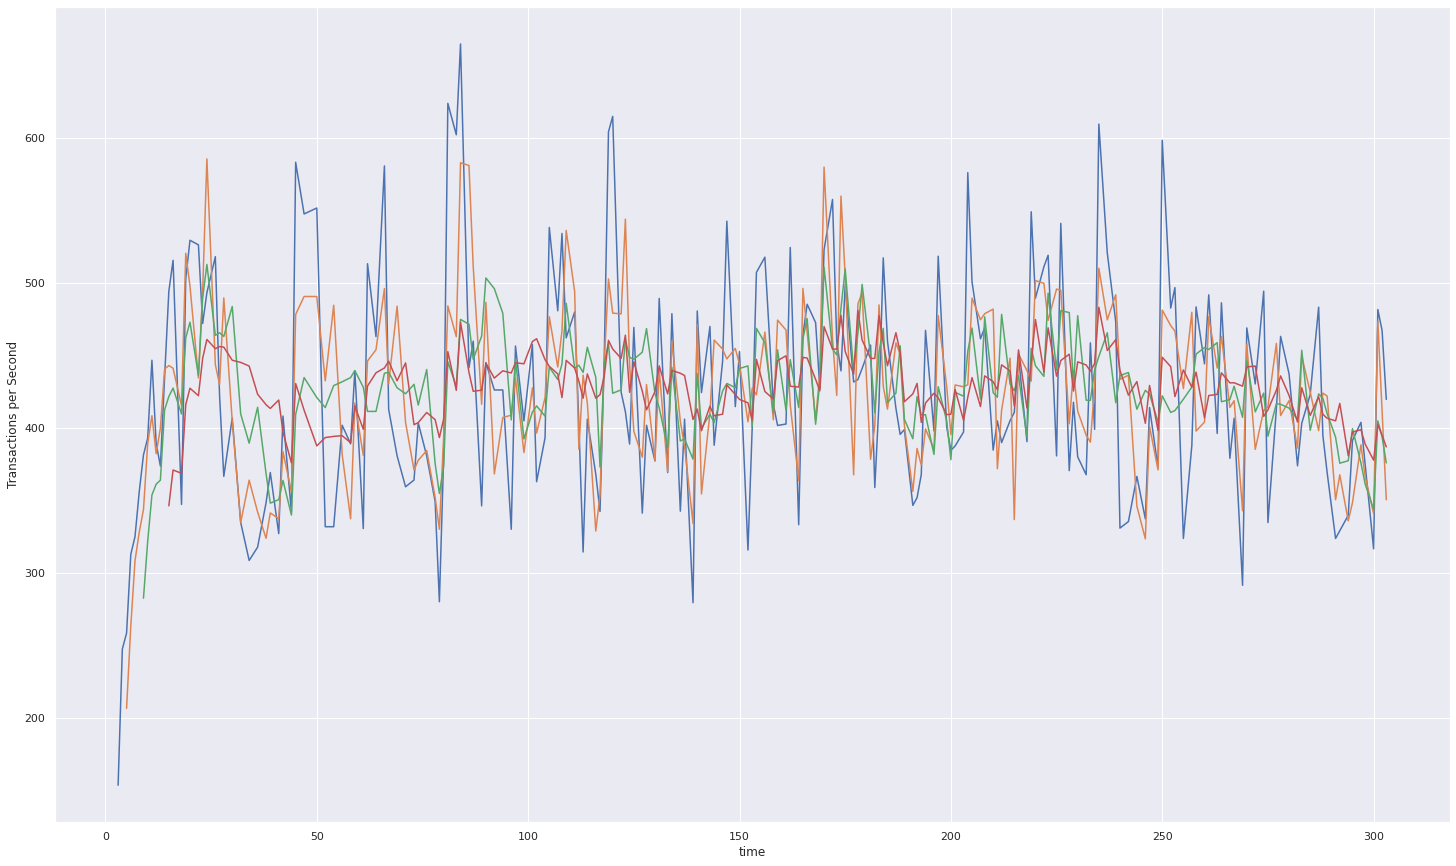

In [30]:
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=3).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=9).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=15).mean())

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    

In [31]:
# transactions per second


def printWithWindowSize(windowSize):
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=windowSize).mean(), label='7 txs all 18 ms')

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    plt.legend()
    






# plotet.write_html('output/throughput' + windowSize +'.html')


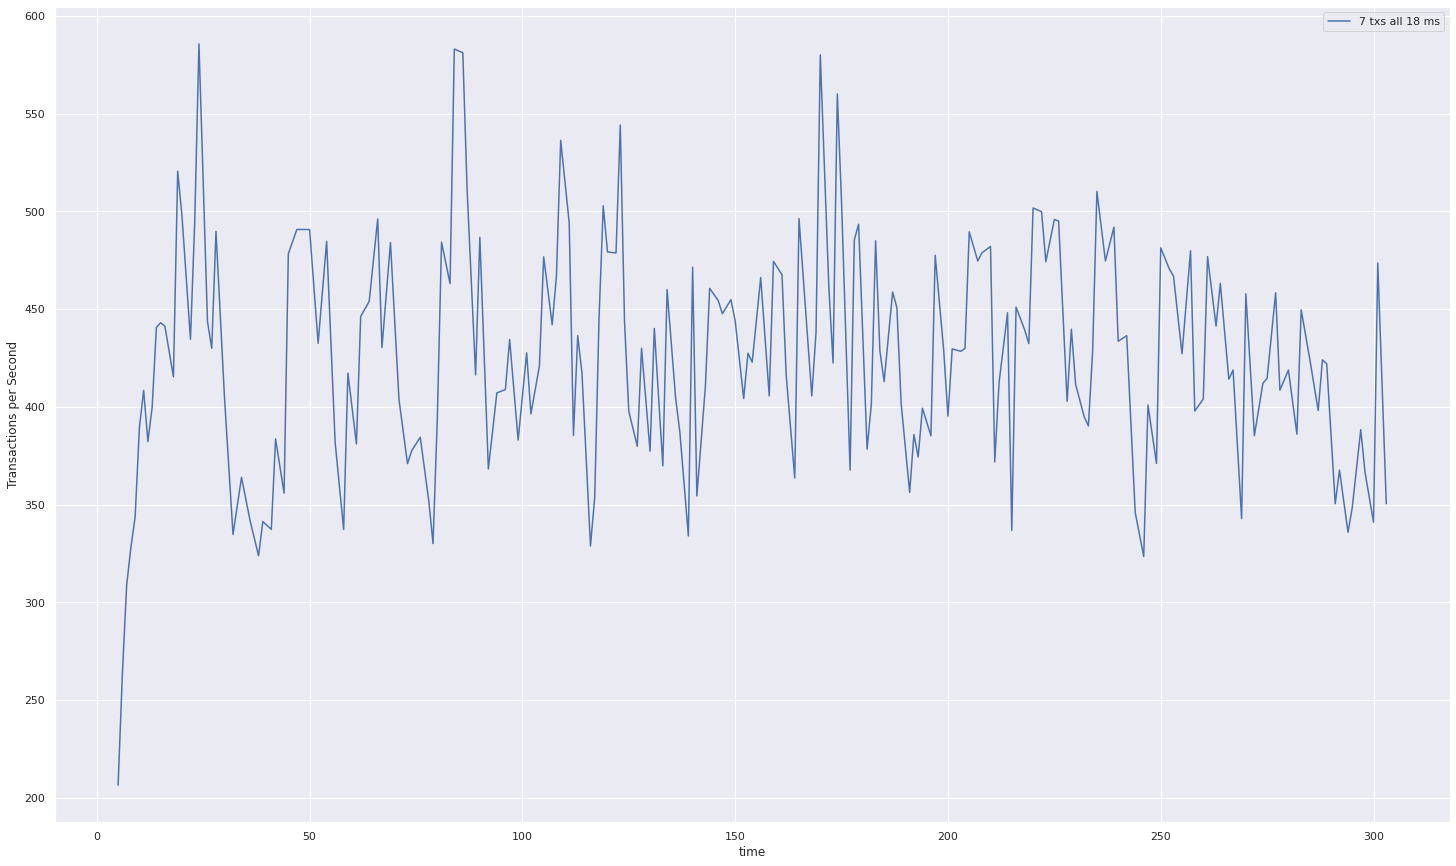

In [32]:
 
printWithWindowSize(5)


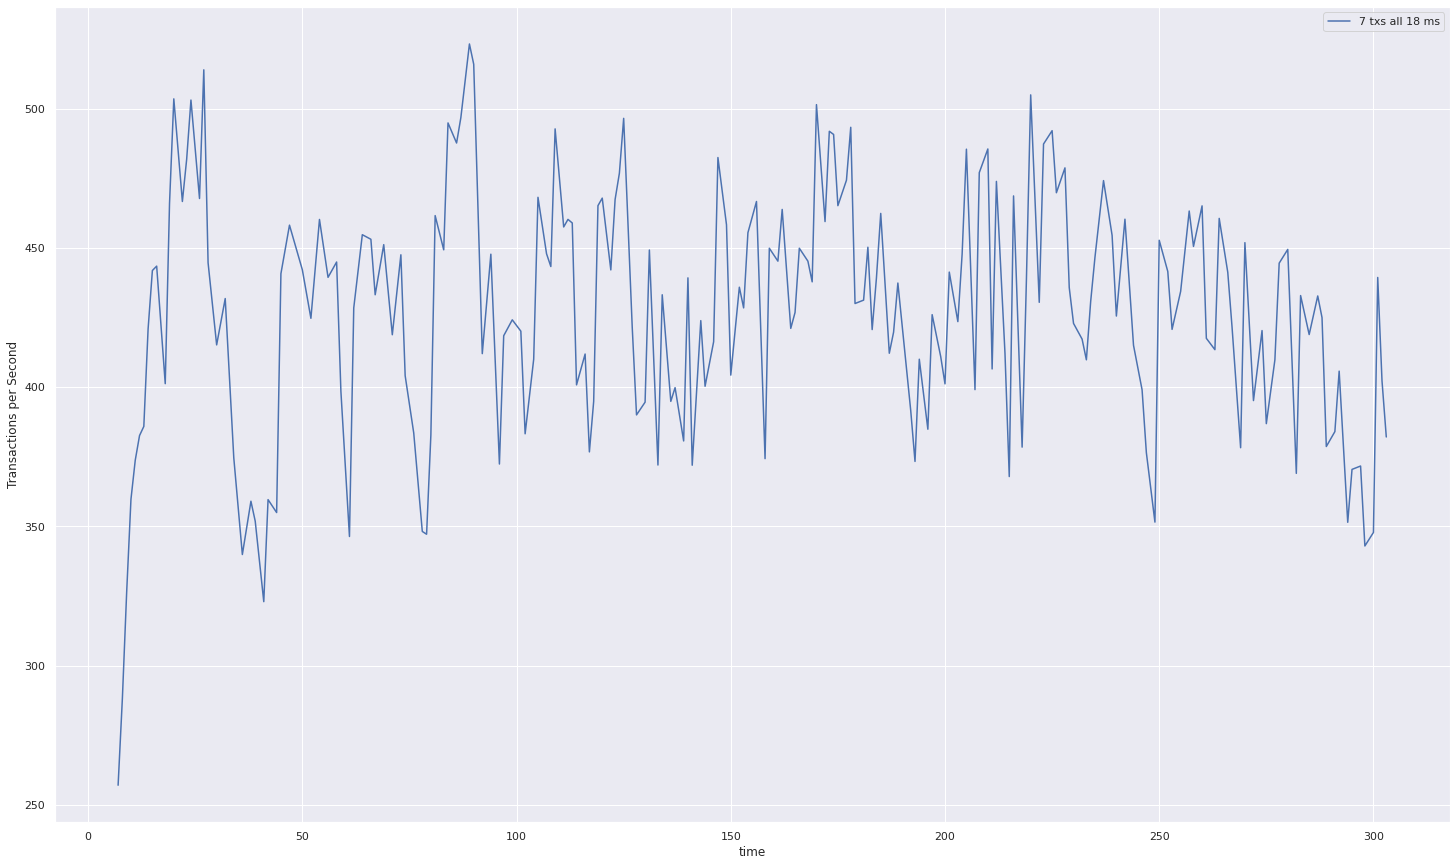

In [33]:
 
printWithWindowSize(7)


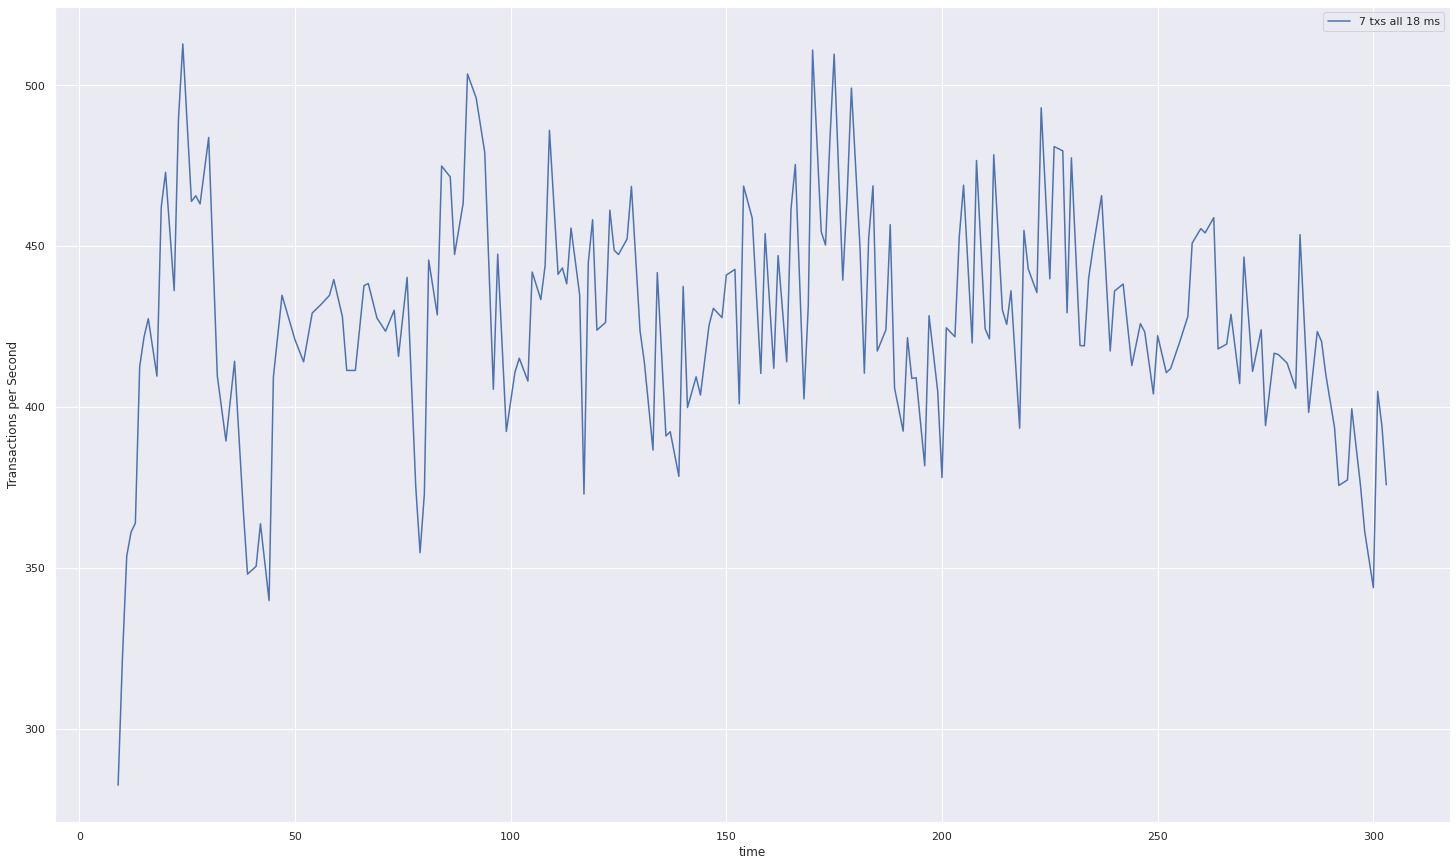

In [34]:
 
printWithWindowSize(9)


In [35]:
windowSize = 5

x = (df1.blockTimeSinceStart, df1.txs.rolling(window=windowSize).min(), df1.txs.rolling(window=windowSize).mean())
x

(0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 103    278
 104    284
 105    291
 106    296
 107    303
 Name: blockTimeSinceStart, Length: 108, dtype: int64,
 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
           ...    
 103    158.666667
 104    158.666667
 105    136.000000
 106    136.000000
 107    136.000000
 Name: txs, Length: 108, dtype: float64,
 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
           ...    
 103    165.013333
 104    165.013333
 105    160.480000
 106    166.826667
 107    162.293333
 Name: txs, Length: 108, dtype: float64)

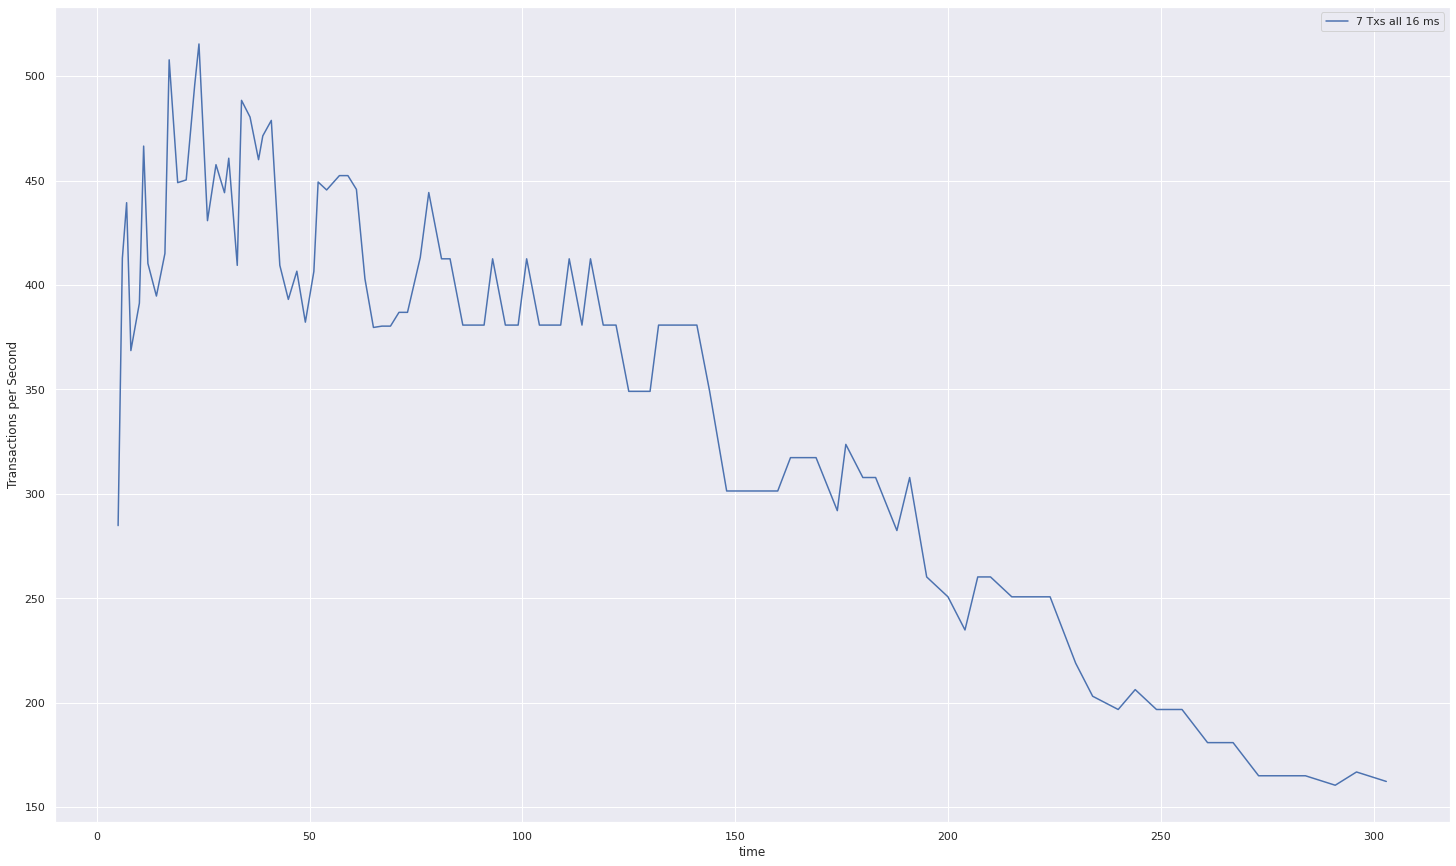

In [36]:
# transactions per second

arange = 8




plt.errorbar(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
#plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean(), label='7 txs all 18 ms')

plt.xlabel('time')
plt.ylabel('Transactions per Second')

# major_ticks = np.arange(0, 23, 1)
# plt.yticks(major_ticks)

plt.ticklabel_format(style='plain')
plt.legend()


In [85]:
df2.txs.mean()


421.70063191153235